## Project Description

<b>We will try to perform statistical and exploratory analysis of data, and by doing so will try to observe how features present in our dataset behaves separately and among each other.Also insights we will be getting can further help Airbnb to enhance decision making and improve profitability.My attempt will be to keep analysis clear and precise, so to make the understanding of reader very clear.</b>

#### Importing necessary libraries


In [1]:
#importing necessery libraries for future analysis of the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [2]:
#using pandas library and 'read_csv' function to read file 
airbnb=pd.read_csv(r"G:\data sets for analysis\airbnb.csv")
airbnb.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
# Checking datatype for every column
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

#### Insights:
    We can perform in-depth data exploration on these columns as we can obtain beneficial information for our analysis
    Null values are present in dataset,need to handle those values 


####  Data Cleaning

In [4]:
#Checking for all the null values present in dataset
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
#dropping columns that are irrelevant for our future data exploration and predictions
airbnb.drop(['id','host_name','last_review'], axis=1, inplace=True)

airbnb.head(5)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [6]:
# replacing all NaN values in reviews_per_month with 0
airbnb.fillna({'reviews_per_month': 0}, inplace = True)

# checking changes
airbnb.reviews_per_month.isnull().sum()

0

In [7]:
airbnb['price'].value_counts()

100    2051
150    2047
50     1534
60     1458
200    1401
       ... 
780       1
386       1
888       1
483       1
338       1
Name: price, Length: 674, dtype: int64

In [8]:
airbnb.shape

(48895, 13)

In [9]:
# dropping columns where price equals 0, as it is not possible to get price as zero
airbnb =airbnb[airbnb['price'] !=0]


In [10]:
#checking if zero price is removed
print('0' in airbnb['price'])

False


In [11]:
#Checking what is the maximum value of minimum_nights a guest can stay at the place
airbnb['minimum_nights'].nunique()
airbnb['minimum_nights'].max()


1250

     While checking minimum nights,I found many values above 14, and maximum value I got was 1250, but according to Airbnb's 
     policy ,guest can stay for maximum of 29 days after that hosts needs further permissions.Therefore, I will 
     drop minimum_nights which are greater than 29

In [12]:
(airbnb['minimum_nights']>29).value_counts()


False    44379
True      4505
Name: minimum_nights, dtype: int64

In [13]:
#Got all indexes with value of minimum nights greater than 29 in a variable, and will drop them to get better analysis of data 
index_def=airbnb[airbnb['minimum_nights']>29].index

In [14]:
index_def.shape

(4505,)

#### Insight

There are about 4505 rows in data where minimum_nights stay is beyond 29, in some cases more than 500, so to clean data further it is necessary to remove any rows above 29(sticking to company's policies)

In [15]:
airbnb2=airbnb.drop(index_def)

In [16]:
#checking my new data after fixing minimum_nights
airbnb2.shape

(44379, 13)

In [17]:
#Checking for unique values in neighbourhood_group
airbnb2.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [18]:
#Checking for unique values in neighbourhood
len(airbnb2.neighbourhood.unique())

221

In [19]:
# checking different room types availabe
airbnb2.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

#### Exploratory Data Analysis

In [20]:
#Finding corelation among attribute plotting heatmap

Index(['name', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

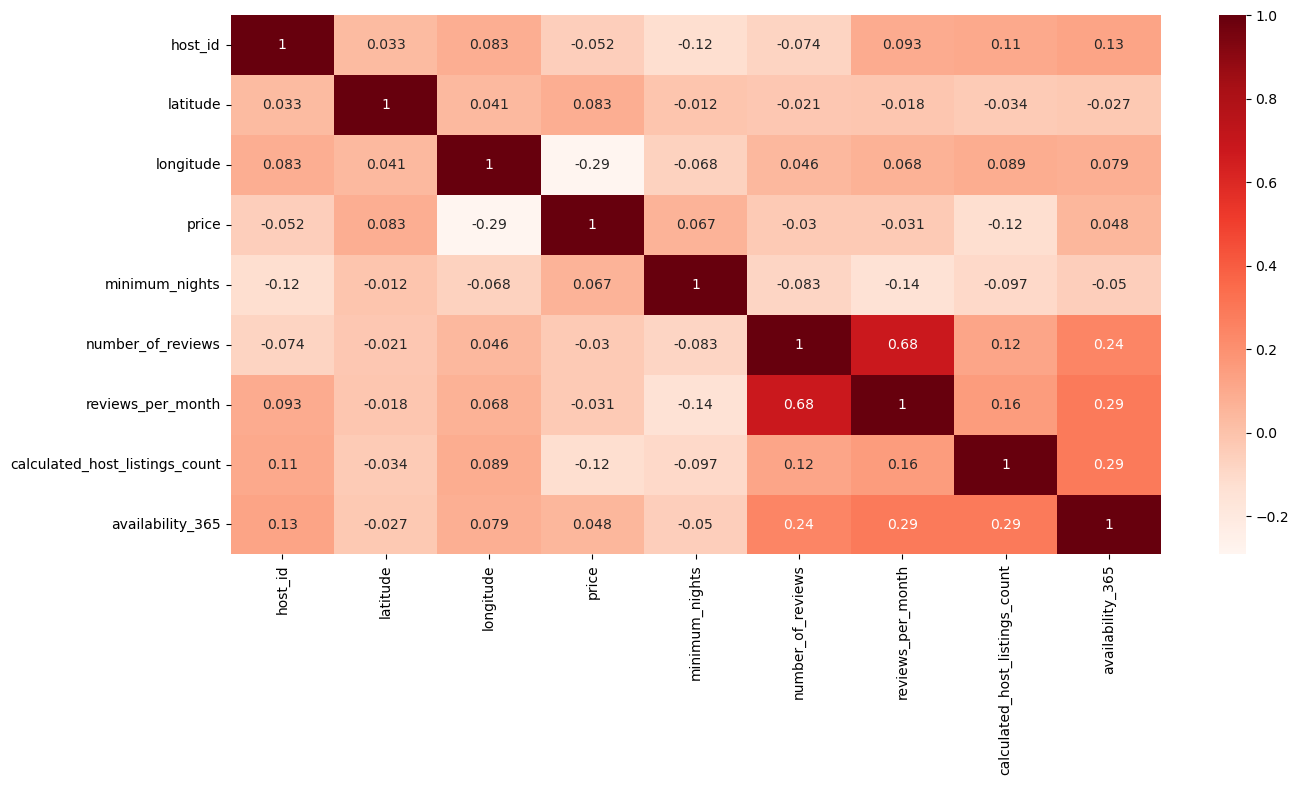

In [21]:
corr = airbnb2.corr(method = 'kendall')
plt.figure(figsize = (15, 7))
sns.heatmap(corr, annot = True, cmap="Reds")
airbnb.columns

#### Checking for the hosts with maximum number of listings

In [22]:
most_listing_hosts = airbnb2.host_id.value_counts().head()
most_listing_hosts

219517861    327
12243051      96
205031545     49
190921808     40
119669058     34
Name: host_id, dtype: int64

In [23]:
#For a better visualization,we will be creating a dataframe and rename index as Host ID, and host_id as Listings.
most_host_df=pd.DataFrame(most_listing_hosts)
most_host_df.reset_index(inplace=True)
most_host_df.rename(columns={'index':'Host_ID', 'host_id':'Number_of_listings'}, inplace=True)
most_host_df



,Host_ID,Number_of_listings
0,219517861,327
1,12243051,96
2,205031545,49
3,190921808,40
4,119669058,34


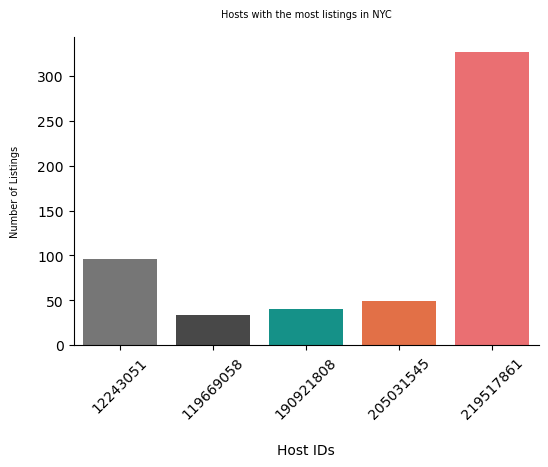

In [24]:

fig, ax = plt.subplots(figsize = (6, 4))
ax = sns.barplot(x = most_host_df.Host_ID, 
                 y = most_host_df.Number_of_listings, 
                 data = most_host_df, 
                 palette = ('#767676', '#484848', '#00A699', '#FC642D', '#FF5A5F'))

sns.despine(top = True, right = True)
ax.set_title('Hosts with the most listings in NYC\n', size = 7)
ax.set_ylabel('Number of Listings\n', size = 7)
ax.set_xlabel('\nHost IDs', size = 10)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
plt.rcParams['figure.dpi'] = 300

plt.show()


### Prices by Neighbourhood


#### We will now attempt to check prices in different neighbourhood groups

In [25]:
# Brooklyn
location_1 = airbnb2.loc[airbnb2['neighbourhood_group'] == 'Brooklyn']
price_loc1 = location_1[['price']]

# Manhattan
location_2 = airbnb2.loc[airbnb2['neighbourhood_group'] == 'Manhattan']
price_loc2 = location_2[['price']]

# Queens
location_3 = airbnb2.loc[airbnb2['neighbourhood_group'] == 'Queens']
price_loc3 = location_3[['price']]

# Staten Island
location_4 = airbnb2.loc[airbnb2['neighbourhood_group'] == 'Staten Island']
price_loc4 = location_4[['price']]

# Bronx
location_5 = airbnb2.loc[airbnb2['neighbourhood_group'] == 'Bronx']
price_loc5 = location_5[['price']]

# create list of prices' dfs
price_list = [price_loc1, price_loc2, price_loc3, price_loc4, price_loc5]

In [26]:
# empty list that will be appended with price distributions for each neighbourhood
price_list_2 = []
neighbourhood_list=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

#getting statistics for the price ranges and appending it to empty list
# get statistics for price ranges and append it to the empty list
for value in price_list:
    i = value.describe(percentiles = [.25, .50, .75])
    i = i.iloc[3:]
    i.reset_index(inplace = True)
    i.rename(columns = {'index':'Statistics'}, inplace = True)
    price_list_2.append(i)
    
    
# replace the pricing columns names with the areas names
price_list_2[0].rename(columns = {'price': neighbourhood_list[0]}, inplace = True)
price_list_2[1].rename(columns = {'price': neighbourhood_list[1]}, inplace = True)
price_list_2[2].rename(columns = {'price': neighbourhood_list[2]}, inplace = True)
price_list_2[3].rename(columns = {'price': neighbourhood_list[3]}, inplace = True)
price_list_2[4].rename(columns = {'price': neighbourhood_list[4]}, inplace = True)

# modifying dataframe
df_statistics = price_list_2
df_statistics = [df.set_index('Statistics') for df in df_statistics]
df_statistics = df_statistics[0].join(df_statistics[1:])
df_statistics

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Statistics,,,,,
min,10.0,10.0,10.0,13.0,10.00
25%,60.0,90.0,53.0,50.0,45.75
50%,92.0,145.0,75.0,75.0,65.00
75%,150.0,215.0,115.0,110.0,99.00
max,10000.0,9999.0,2600.0,5000.0,2500.00


Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

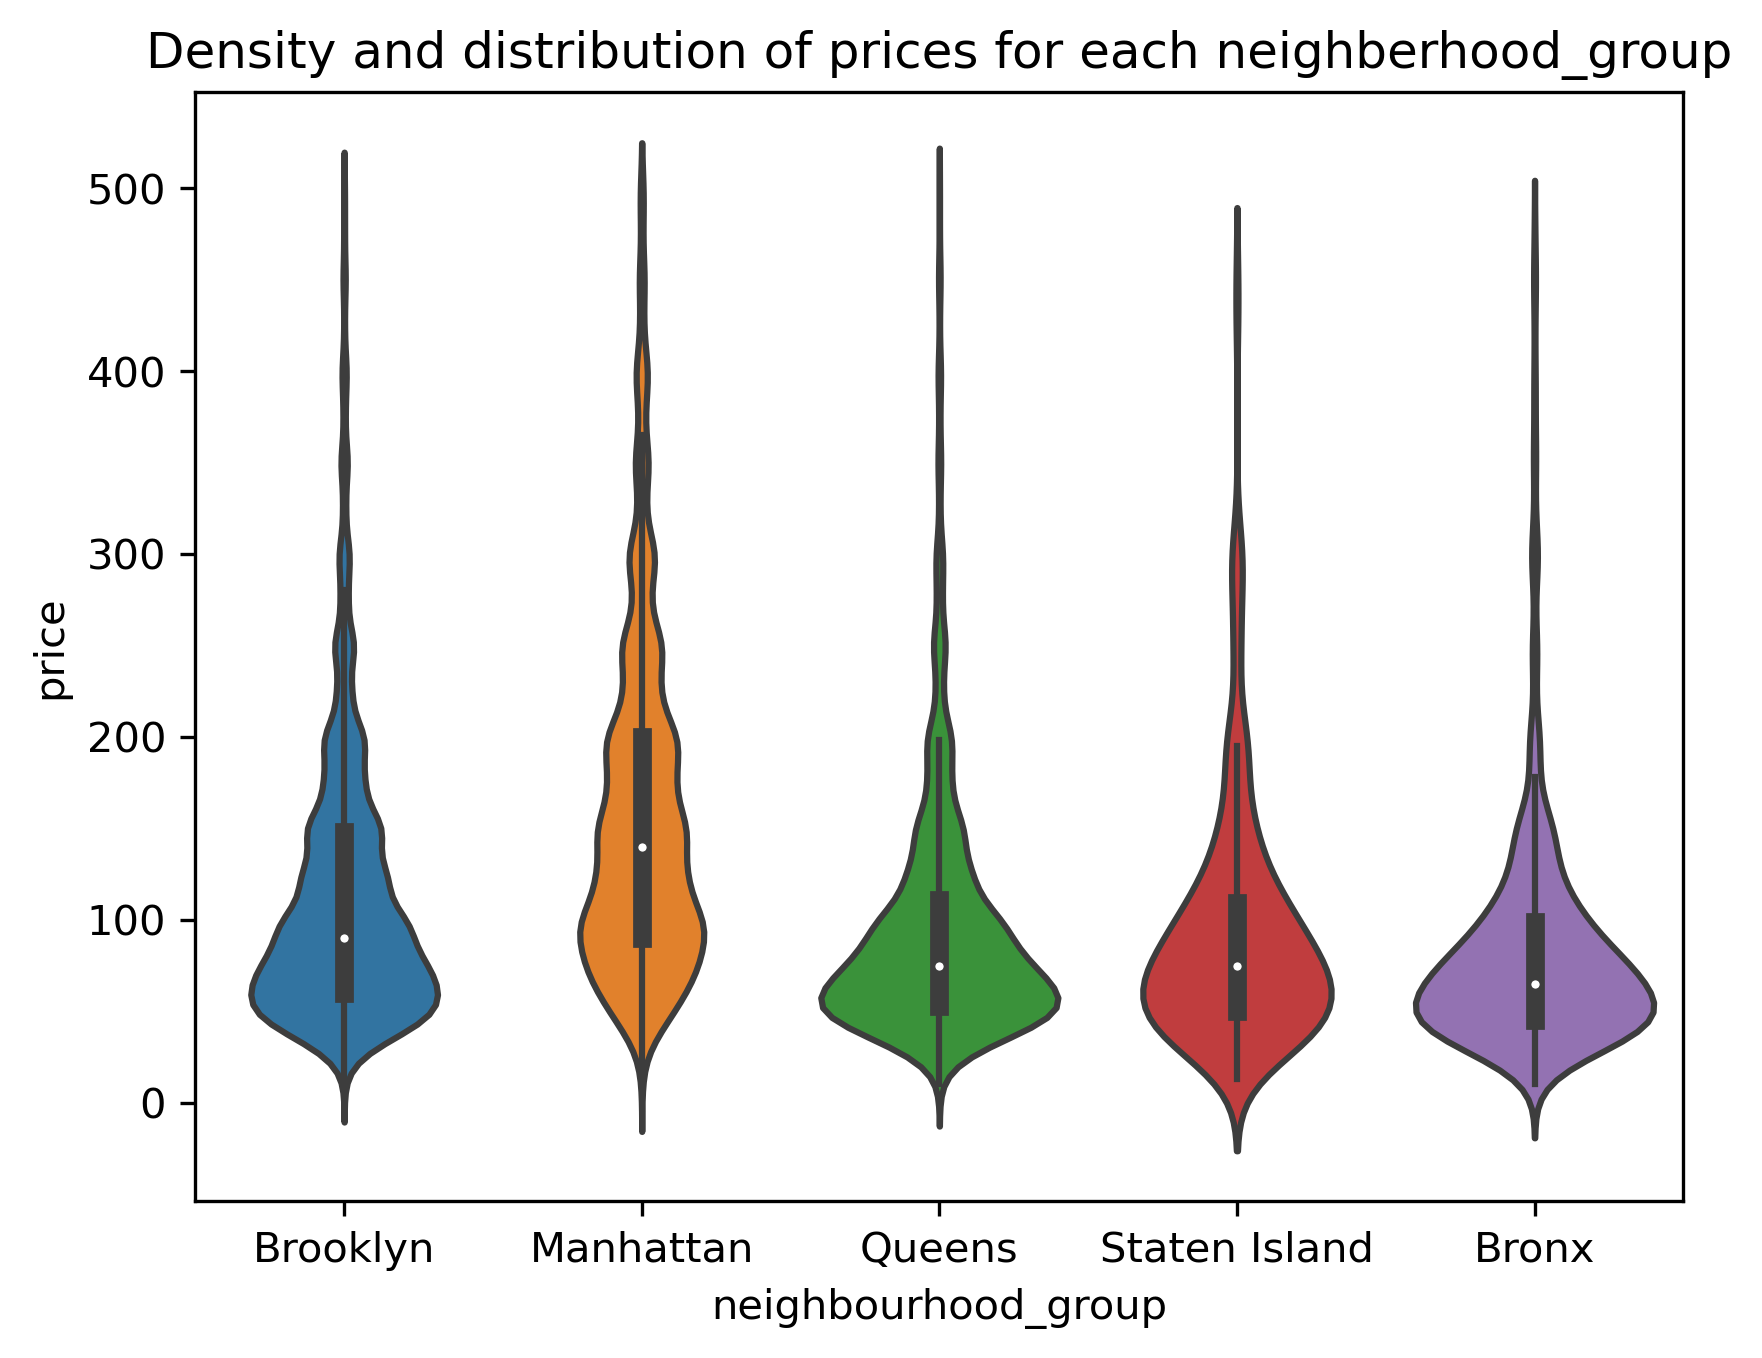

In [27]:
#creating a sub-dataframe with no value less than 500
sub_df=airbnb2[airbnb2.price < 500]
#using violinplot to showcase density and distribtuion of prices 
chart=sns.violinplot(data=sub_df, x='neighbourhood_group', y='price')
chart.set_title('Density and distribution of prices for each neighberhood_group')

In [28]:
# Getting top 10 neighbourhoods
airbnb2.neighbourhood.value_counts().head(10)

Williamsburg          3718
Bedford-Stuyvesant    3458
Harlem                2470
Bushwick              2281
East Village          1707
Hell's Kitchen        1646
Upper West Side       1607
Crown Heights         1485
Upper East Side       1458
Midtown               1218
Name: neighbourhood, dtype: int64

In [29]:
# top 10 neighbourhoods for sub df
df_sub = airbnb2.loc[airbnb2['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem',
                                                  'Bushwick','Upper West Side','Hell\'s Kitchen',
                                                  'East Village', 'Upper East Side','Crown Heights','Midtown']
                                                )]

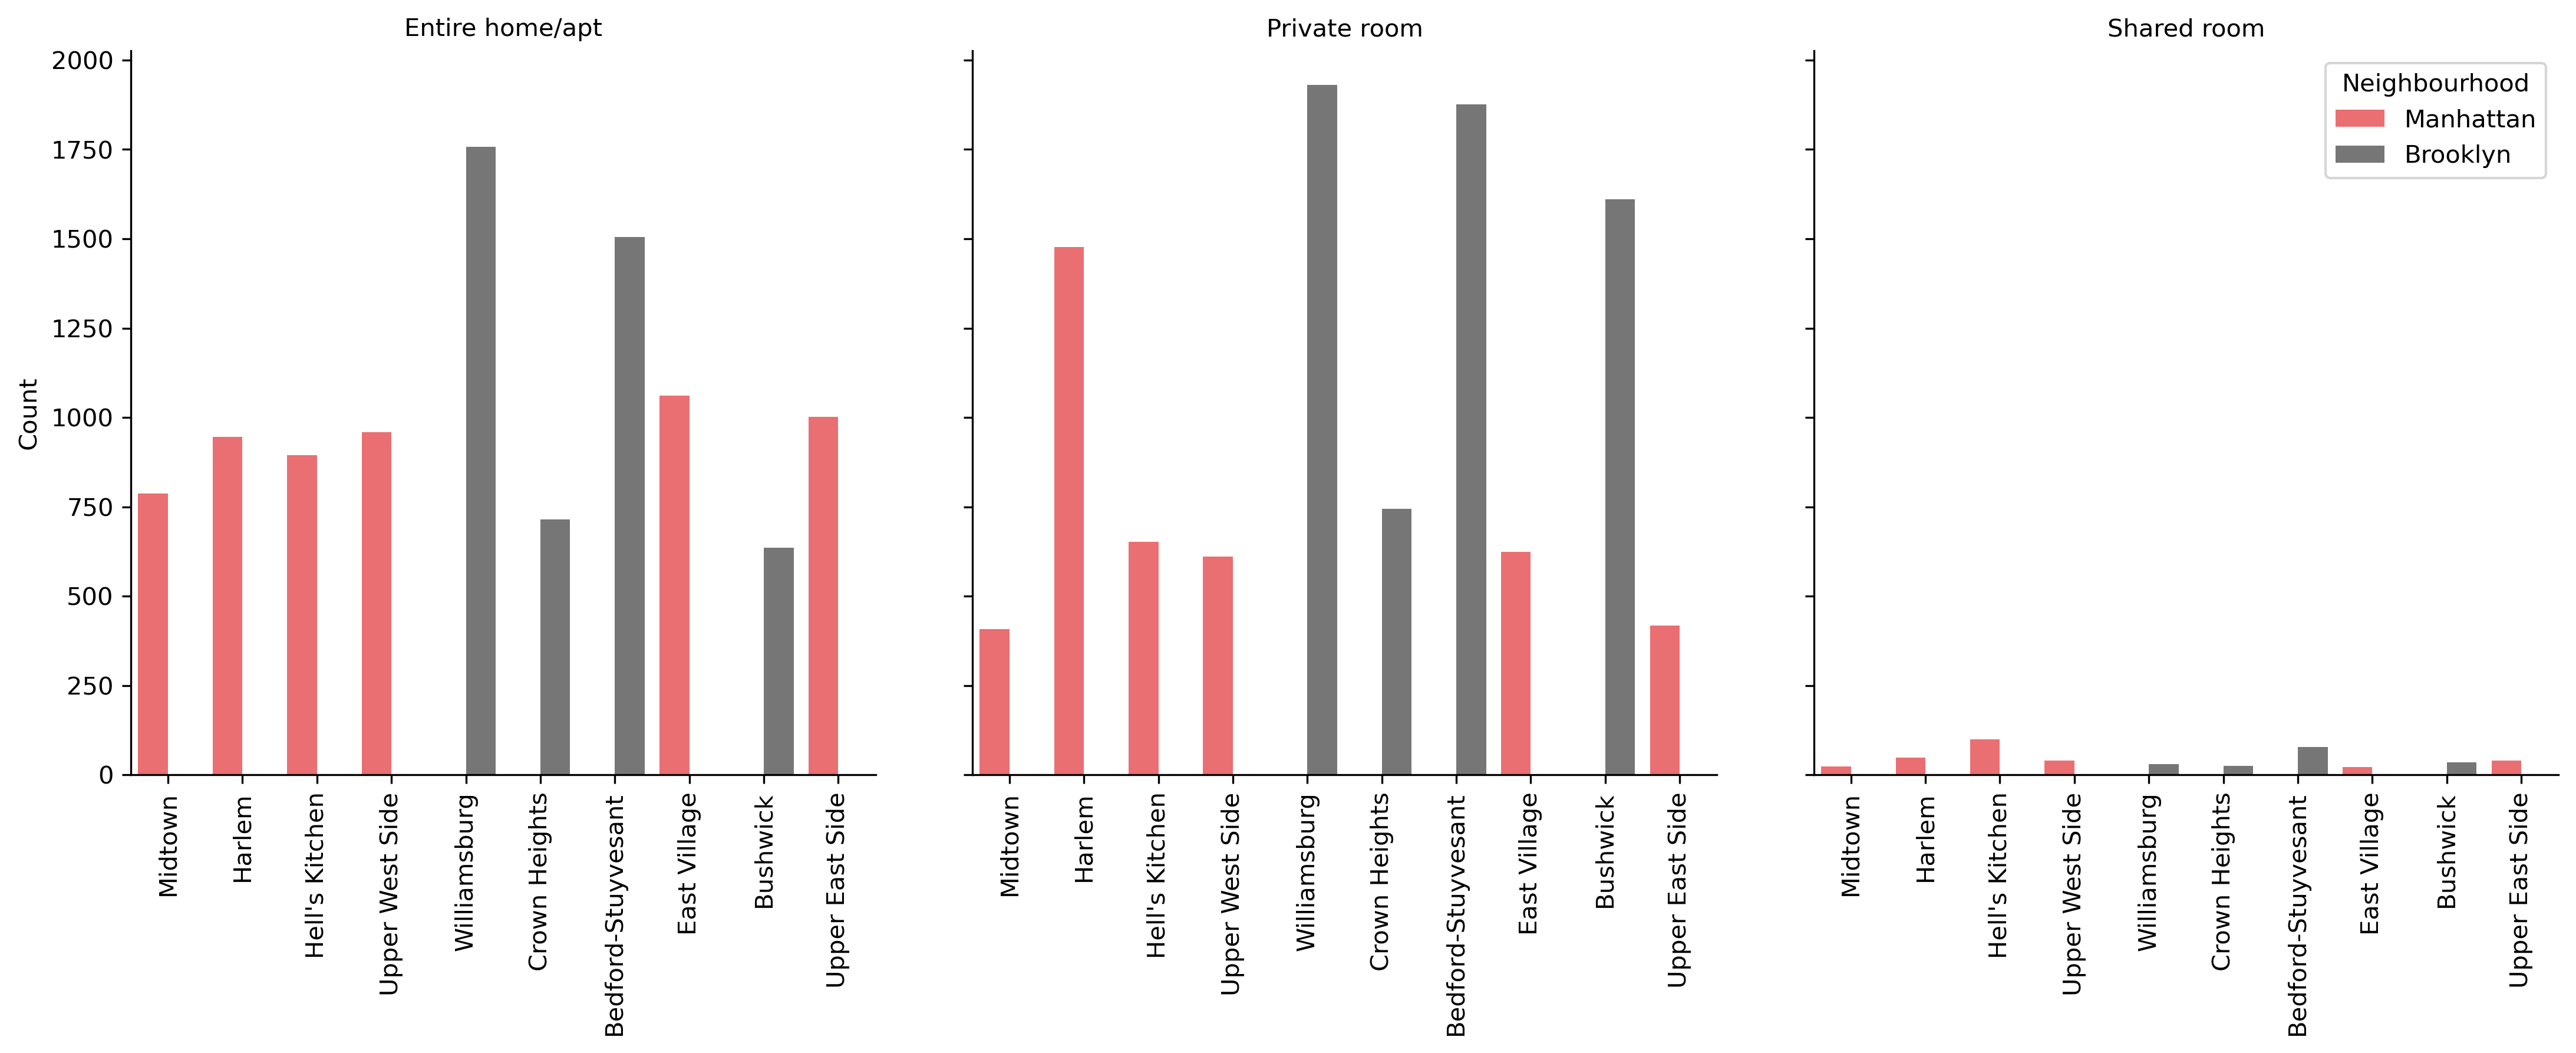

In [30]:
ax = sns.catplot(x = 'neighbourhood', 
                 hue = 'neighbourhood_group', 
                 col = 'room_type', 
                 data = df_sub, 
                 kind = 'count', 
                 legend = False, 
                 palette=('#FF5A5F', '#767676'))

ax.set_axis_labels('', 'Count')
ax.set_titles("{col_name}")
plt.legend(title = 'Neighbourhood', loc = 'upper right')
ax.set_xticklabels(rotation = 90)

### Most Reviewed Listings and Average Price


In [31]:
most_reviewed = airbnb.nlargest(10, 'number_of_reviews')
most_reviewed

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,Steps away from Laguardia airport,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,Private brownstone studio Brooklyn,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,LG Private Room/Family Friendly,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


In [32]:
# finding average price according to most viewed 
avg_price = most_reviewed.price.mean()
print('Average price / night: ', avg_price)

Average price / night:  65.4


####  Conclusion